Case Summary<a href="#Case-Summary" class="anchor-link">¶</a>
-------------------------------------------------------------

East-West Airlines is trying to learn more about its customers. Key
issues are their flying patterns, earning and use of frequent flyer
rewards, and use of the airline credit card. The task is to identify
customer segments via clustering. The file EastWestAirlines.xls contains
information on 4000 passengers who belong to an airline’s frequent flier
program. For each passenger the data include information on their
mileage history and on different ways they accrued or spent miles in the
last year. **The goal is to try to identify clusters of passengers that
have similar charactersitics for the purpose of targeting different
segments for different types of mileage offers.**

Please prepare a notebook including answers to each of the following
questions:

1.  Apply hierarchical clustering with Euclidean distance and complete
    linkage. How many clusters appear to be appropriate? (***25
    points***)

2.  Compare the cluster centroids to characterize the different clusters
    and try to give each cluster a label. (***20 points***)

3.  To check the stability of the clusters, remove a random 5% of the
    data (by taking a random sample of 95% of the records, namely 200
    records), and repeat the analysis. Does the same picture emerge? Use
    425 as the seed. (***10 points***)

4.  Use k-means algorithm with the number of clusters you found in part
    (a). Does the same picture emerge? (***25 points***)

5.  Which clusters would you target for offers, and what type of offers
    would you target to customers in that cluster? (***20 points***)

Below we provided you with a list of libraries that might be useful for
your case study. This list is only a sample of what you might need; you
are free to use any additional library serving your purpose.

**The homework is due Sunday, October 23 midnight.**

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
---------------------------------------------------------------------

-   **Field Name**=ID\#; **Data Type**=NUMBER; **Description**=Unique ID

-   **Field Name**=Balance; **Data Type**=NUMBER; **Description**=Number
    of miles eligible for award travel

-   **Field Name**=Qual\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles counted as qualifying for Topflight
    status

-   **Field Name**=cc1\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with freq. flyer credit card
    in the past 12 months:

-   **Field Name**=cc2\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Rewards credit card in
    the past 12 months:

-   **Field Name**=cc3\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Small Business credit
    card in the past 12 months:

-   For cc1\_miles,cc2\_miles and cc3\_miles bins mean following ranges:

          - 1 = under 5,000
          - 2 = 5,000 - 10,000
          - 3 = 10,001 - 25,000
          - 4 = 25,001 - 50,000
          - 5 = over 50,000

-   **Field Name**=Bonus\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles earned from non-flight bonus
    transactions in the past 12 months

-   **Field Name**=Bonus\_trans; **Data Type**=NUMBER;
    **Description**=Number of non-flight bonus transactions in the past
    12 months

-   **Field Name**=Flight\_miles\_12mo; **Data Type**=NUMBER;
    **Description**=Number of flight miles in the past 12 months

-   **Field Name**=Flight\_trans\_12; **Data Type**=NUMBER;
    **Description**=Number of flight transactions in the past 12 months

-   **Field Name**=Days\_since\_enroll; **Data Type**=NUMBER;
    **Description**=Number of days since Enroll\_date

-   **Field Name**=Award?; **Data Type**=NUMBER; **Description**=Dummy
    variable for Last\_award (1=not null, 0=null)

Collaborators:
* Ömer Uğur Üci (uci19@itu.edu.tr)
* Harun Lokman Kılıç (kilichar18@itu.edu.tr)

# Sample Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster

# Get Data

In [3]:
data=pd.read_excel('EastWestAirlines.xls', sheet_name='data')

In [4]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Question 1

We have used scipy's own linkage module to create a complete linkage by Euclidean distance.

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
zipped = list(zip(data.Balance, data.Qual_miles, data.cc1_miles, data.cc2_miles, data.cc3_miles, data.Bonus_miles,
                 data.Bonus_trans, data.Flight_miles_12mo, data.Flight_trans_12, data.Days_since_enroll, data.Award))
linkage_data = linkage(zipped, method='complete', metric='euclidean')

We have then graphed the dendrogram for all of the data. However, this dendrogram was confusing, non-readable and contained too many clusters: preventing it from being handy at all.

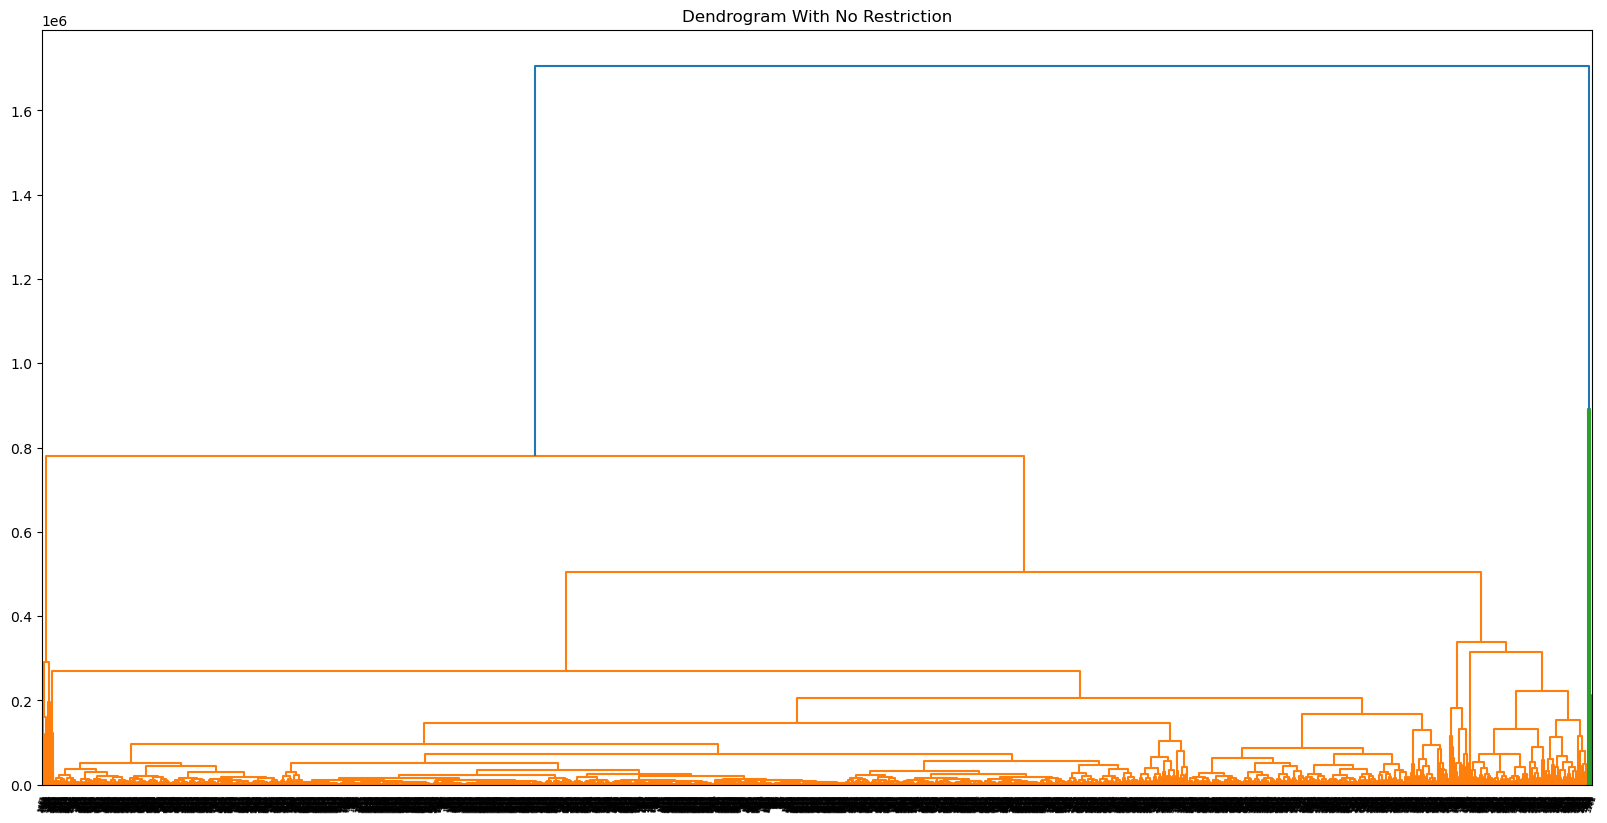

In [6]:
plt.figure(figsize=(20,10)).set_dpi(100)
dendrogram(linkage_data)
plt.xticks(rotation=70)
plt.title("Dendrogram With No Restriction")
plt.show()

So we decided to truncate the dendrogram to contain at maximum 5 levels. After that, we have determined that around y = 0.4, cluster size/cluster count ratio was appropriate. **So we have drawn a line that passes through y = 0.4 which intersected the dendrogram at 6 points which represented 5 different clusters and 1 singleton.** 

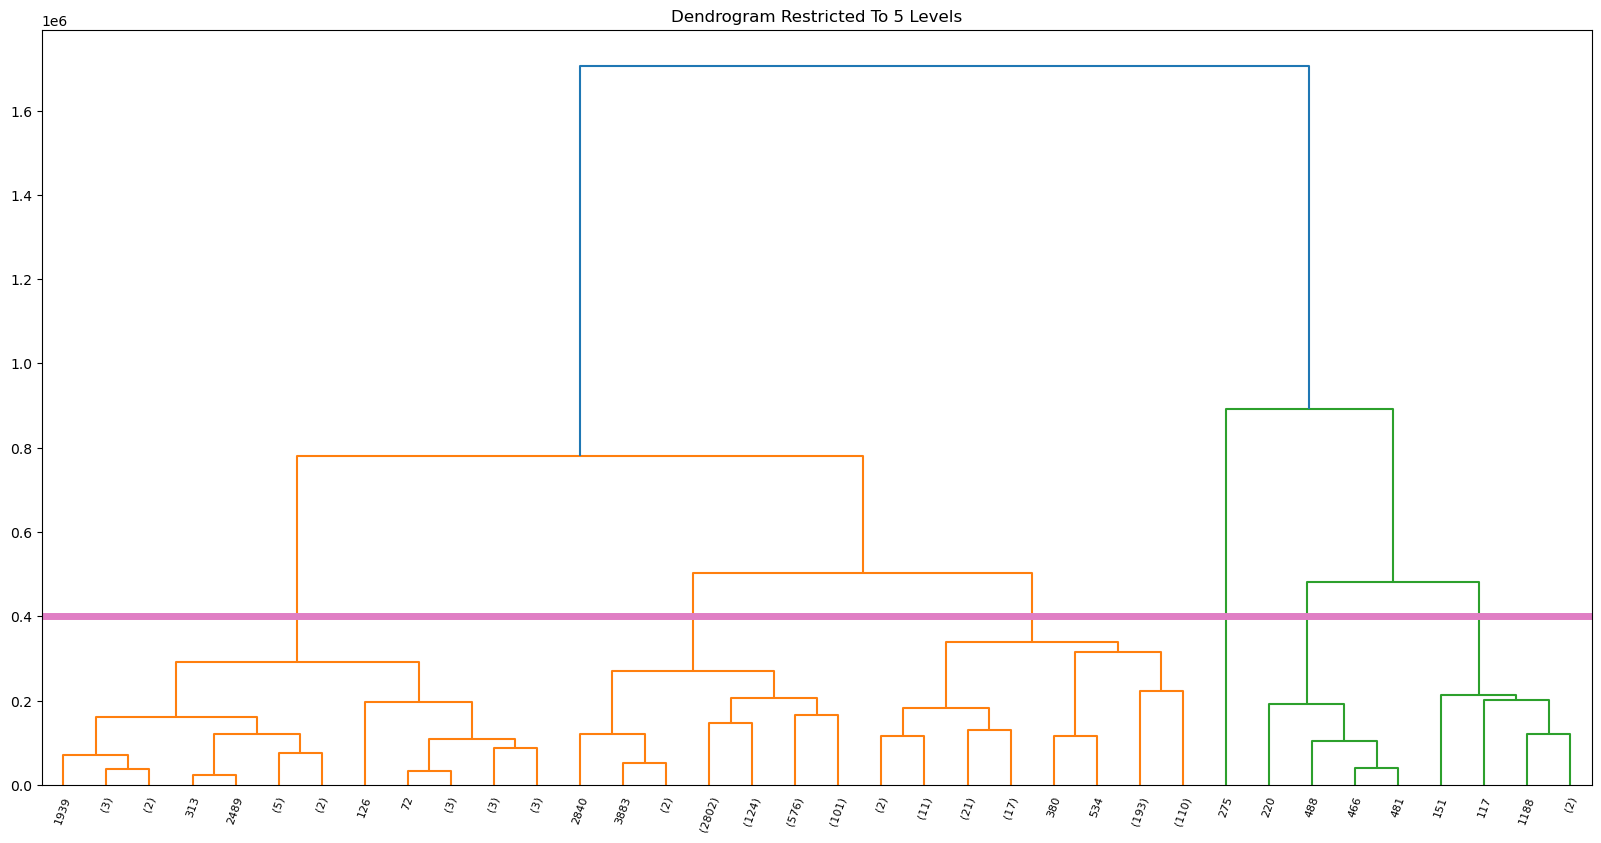

In [7]:
plt.figure(figsize=(20, 10)).set_dpi(100)
dendrogram(linkage_data,  p = 5, truncate_mode = 'level')
plt.axhline(y=4*pow(10, 5), color = "#e07ec4", linewidth = 5)
plt.xticks(rotation=70)
plt.title("Dendrogram Restricted To 5 Levels")
plt.show()

# Question 2

We have used scipy's fcluster function to simulate the clusters observed in the dendrogram above. We have then calculated the clusters' centroids via the datapoints' arithmetic means to find the centroids of the clusters.

In [8]:
w_cluster_labels = data.copy().drop(columns = ["ID"])
fl = fcluster(linkage_data, 5, criterion='maxclust')
fl = ["C"+str(item) for item in list(fl)]
w_cluster_labels["Cluster_Label"] = fl

centroids_dict = {}
count_dict = {}
for item in set(fl):
    current_df = w_cluster_labels[w_cluster_labels["Cluster_Label"]== item]
    centroids_dict.update({item:current_df[[x for x in current_df.columns if x != "Cluster_Label"]].mean()})
    count_dict.update({item:len(w_cluster_labels[w_cluster_labels["Cluster_Label"] == item])})

centroids_df = pd.DataFrame(centroids_dict).T
centroids_df["ClusterSize"] = list(count_dict.values())
centroids_df = centroids_df.sort_values(by = "Balance")
centroids_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterSize
C2,4.929143e+04,117.948988,1.966454,1.014694,1.012753,14951.795952,10.862490,377.169670,1.119213,3985.551705,0.349321,3607
C3,2.511808e+05,360.617978,2.867978,1.014045,1.000000,35303.438202,18.022472,1160.098315,3.452247,5226.303371,0.536517,356
C1,6.239561e+05,531.846154,3.461538,1.000000,1.115385,53774.961538,22.500000,1784.384615,5.846154,6303.500000,0.807692,26
C4,1.021052e+06,962.666667,3.444444,1.000000,1.000000,71981.222222,20.222222,1677.777778,5.777778,6944.000000,0.888889,9
C5,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000,1


Below is the plot of the cluster size. However, the cluster formation resembles **a shifted natural distribution** in terms of cluster size. We preferred labeling the clusters with indices only, e.g., C1, C2 etc.

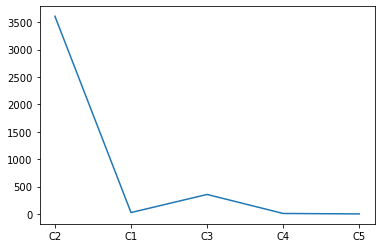

In [9]:
x, y = zip(*count_dict.items())
plt.plot(x, y);

# Question 3

Data is split 5%/95% and the linkage function is executed over the 95% part.

In [10]:
split = train_test_split(data, test_size=0.05, random_state=425)[0]
zipped_split = list(zip(split.Balance, split.Qual_miles, split.cc1_miles, split.cc2_miles, split.cc3_miles, split.Bonus_miles,
                 split.Bonus_trans, split.Flight_miles_12mo, split.Flight_trans_12, split.Days_since_enroll, split.Award))
linkage_split = linkage(zipped_split, method='complete', metric='euclidean')

Then the dendrogram is plotted with the same configuration as done in for the main data.

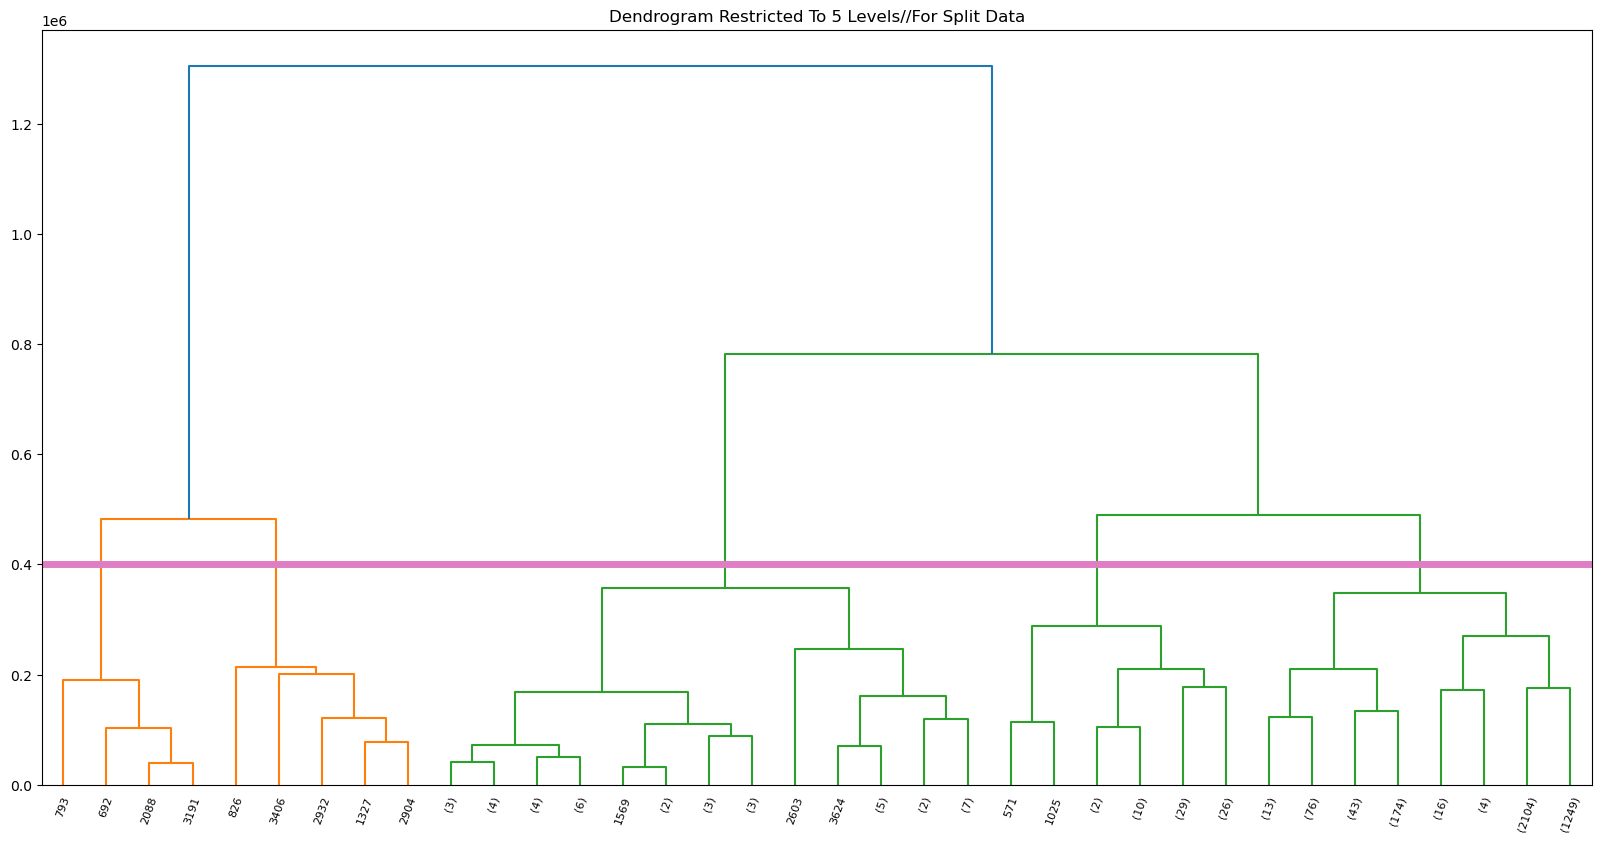

In [11]:
plt.figure(figsize=(20, 10)).set_dpi(100)
dendrogram(linkage_split,  p = 5, truncate_mode = 'level')
plt.axhline(y=4*pow(10, 5), color = "#e07ec4", linewidth = 5)
plt.xticks(rotation=70)
plt.title("Dendrogram Restricted To 5 Levels//For Split Data")
plt.show()

**It can be seen that instead the emergence of 5 clusters and 1 singleton, when split, data forms 5 clusters and no singleton. We can say that the data is not stable in terms of clustering.**

# Question 4

It was assessed that 5 clusters would be sufficient, so with scipy's KMeans function we cluster the data into 5 pieces.

In [12]:
kmeans_clustered = KMeans(n_clusters=5).fit(zipped)

The size of the clusters are found and put in a  dictionary in ascending order

In [13]:
kmeans_dict = {}
labels = list(kmeans_clustered.labels_)
for item in set(labels):
    kmeans_dict.update({"K" + str(item):labels.count(item)})
kmeans_dict = sorted(kmeans_dict.items(), key=lambda x: x[1])
kmeans_dict = {item[0]:item[1] for item in kmeans_dict}
kmeans_dict

{'K1': 19, 'K4': 88, 'K2': 342, 'K3': 1048, 'K0': 2502}

`count_dict` was created above, and is now sorted in ascending order.

In [14]:
count_dict = sorted(count_dict.items(), key=lambda x: x[1])
count_dict = {item[0]:item[1] for item in count_dict}

Cluster sizes obtained in the steps above is now plotted side to side.

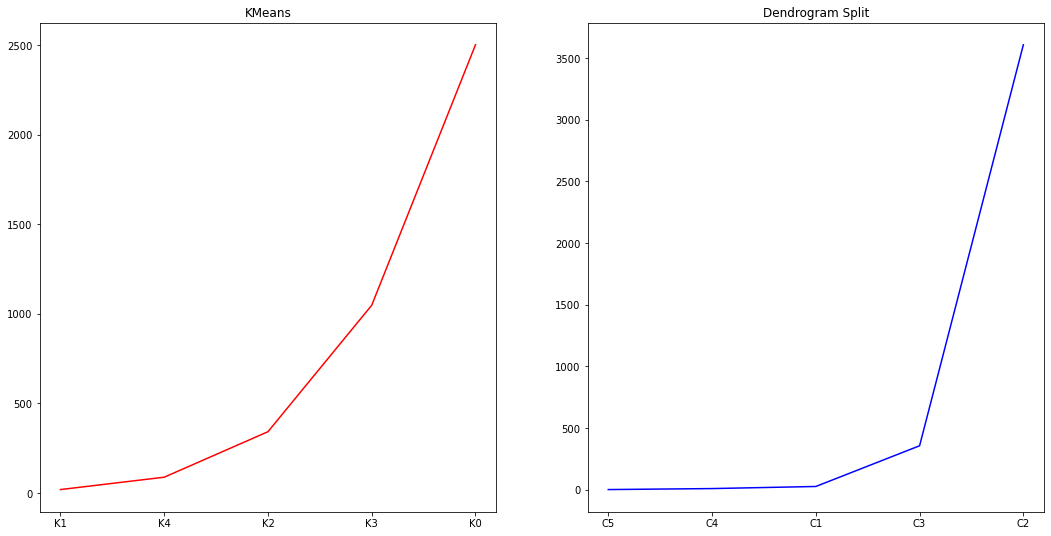

In [15]:
x, y = zip(*count_dict.items())
z, w = zip(*kmeans_dict.items())

plt.figure(figsize = (18, 9))
plt.subplot(1, 2, 1)
plt.title("KMeans")
plt.plot(z, w, "r");
plt.subplot(1, 2, 2)
plt.title("Dendrogram Split")
plt.plot(x, y, "b");

It can be seen from the y axis that the kmeans-clustering the greatest KMeans cluster contains ~2500 datapoints while the dendrogram split has a maximum cluster size of ~3500 datapoints: given that our dataset consists of 4000 points, this is a major difference. And by looking at the relative cluster-size differences for each graph, we can see that Kmeans leads to more moderate cluster distribution, while the dendrogram results have more sharp edges: **In conclusion, the same picture does not emerge for the two.**

# Question 5

One can see from the graphs above that K0 is the biggest cluster for KMeans clustering, so it is rational to make offers to the customers who are in this cluster. Luckily, we can obtain this cluster's centroid with the `KMeans.cluster_centers_` attribute.

In [33]:
kmeans_df = data.copy().drop(columns = "ID")
kmeans_df["ClusterLabel"] = kmeans_clustered.labels_
kmeans_df = kmeans_df[kmeans_df["ClusterLabel"] == 0]
kmeans_df[[item for item in kmeans_df.columns if item != "ClusterLabel"]].mean()

Balance              26238.643885
Qual_miles              99.662670
cc1_miles                1.558753
cc2_miles                1.016787
cc3_miles                1.004396
Bonus_miles           8686.295763
Bonus_trans              8.739808
Flight_miles_12mo      257.964828
Flight_trans_12          0.799361
Days_since_enroll     3736.113909
Award                    0.316147
dtype: float64

* We would encourage the customers in this cluster to spend more with their Small Business credit cards & Rewards credit cards, and we would give them free qualified miles when they inrease their cc1 & cc2 & cc3 miles to 2 or 3.
* We would offer these customers 1 free flight if they stay using the Airlines for 5 more years.